# Домашнее задание «Статистическая проверка гипотез для связанных выборок»

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 1</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

Нулевая гипотеза: Нет значимого различия эффективности препаратов А и B.<br>
Альтернативная гипотеза: Имеется значимое различие эффективности препаратов А и B.<br>
Уровень значимости: 5%


pvalue = 0.08511123469659897
Не получилось отвергнуть нулевую гипотезу


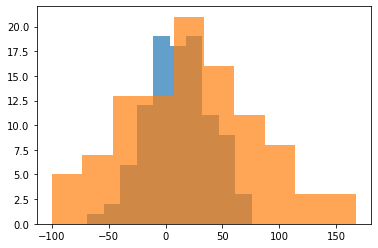

In [3]:
alpha = 0.05
pvalue = stats.ttest_ind(A, B, equal_var=False).pvalue
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
plt.hist(A, alpha=0.7);
plt.hist(B, alpha=0.7);

<div class="alert alert-info">
<b>Задание № 2</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [4]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

Нулевая гипотеза: Нет значимого различия при отсутствии приема и приеме препарата.<br>
Альтернативная гипотеза: Имеется значимое различие при приеме и без.<br>
Уровень значимости: 5%


pvalue = 0.03238579156467659
Отвергаем нулевую гипотезу


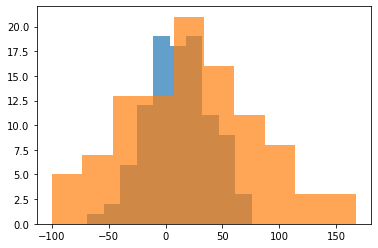

In [5]:
alpha = 0.05
pvalue = stats.ttest_rel(A, B).pvalue
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
plt.hist(A, alpha=0.7);
plt.hist(B, alpha=0.7);

<div class="alert alert-info">
<b>Задание № 3</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [6]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

Нулевая гипотеза: Нет значимого различия разных видов полива.<br>
Альтернативная гипотеза: Есть значимое различие.<br>
Уровень значимости: 5%


pvalue = 2.9240047906326866e-05
Отвергаем нулевую гипотезу

Гистограмма и Диаграмма размаха:


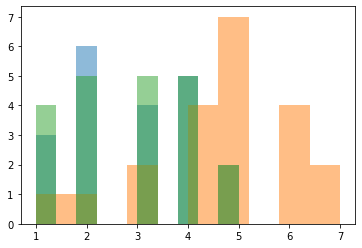

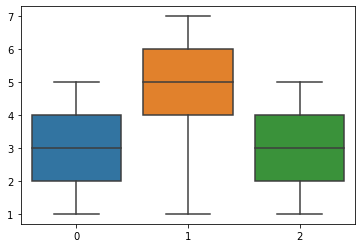

In [7]:
alpha = 0.05
pvalue = stats.f_oneway(water, nutri, mineral).pvalue
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(f'\nГистограмма и Диаграмма размаха:')
plt.hist(water, alpha=0.5);
plt.hist(nutri, alpha=0.5);
plt.hist(mineral, alpha=0.5);
plt.show()
sns.boxplot(data=[water, nutri, mineral]);

Отдельно посмотрим на эффект удобрения по сравнению с минералкой.<br>
Для двух выборок тесты **f_oneway** и **ttest_ind** дадут одинаковый результат:

In [8]:
pvalue_1 = stats.f_oneway(water, mineral).pvalue
pvalue_2 = stats.ttest_ind(water, mineral).pvalue

print(f'pvalue_1 = {pvalue_1},\npvalue_2 = {pvalue_2}')

pvalue_1 = 0.9198340218471527,
pvalue_2 = 0.919834021847144


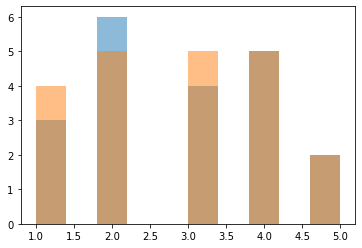

In [9]:
plt.hist(water, alpha=0.5);
plt.hist(mineral, alpha=0.5);

Как видим значимого эффекта от минералки нет.<br>
А вот от удобрения есть:

pvalue = 0.0001840453200503376


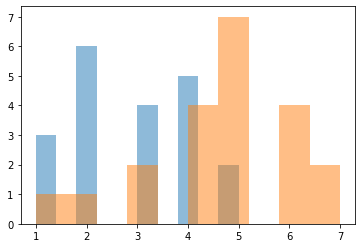

In [10]:
print(f'pvalue = {stats.ttest_ind(water, nutri).pvalue}')
plt.hist(water, alpha=0.5);
plt.hist(nutri, alpha=0.5);

<div class="alert alert-success">
<h4></h4>
</div>

# Cookie Cats

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.
</div>

<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

In [11]:
# Данные A/B тестирования
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [12]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Группы примерно равны по размерам

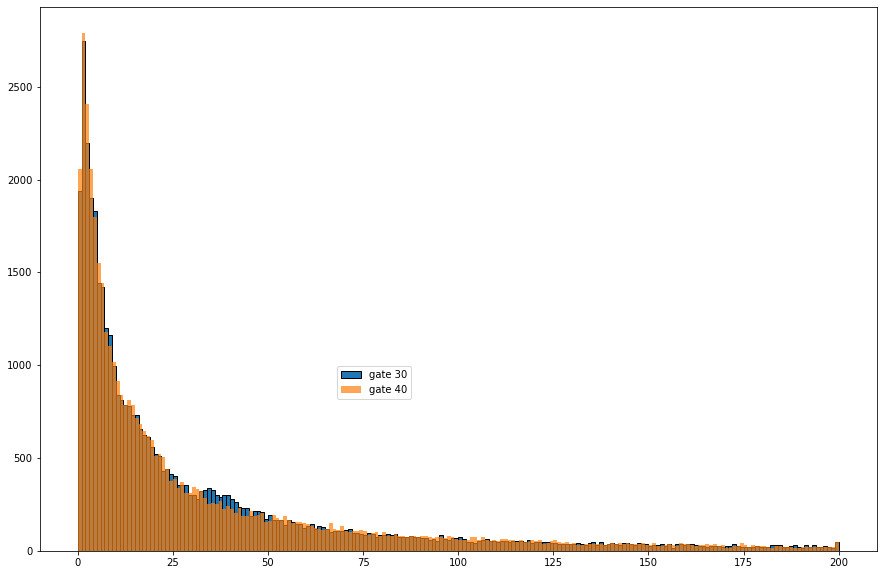

In [13]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)

bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

Заметна разница между группами в диапазоне (25, 50) раундов.<br>
Нужно посмотреть подробнее на разницу в показателе **retention** - есть ли значимая разница в удержании игроков.

In [14]:
# Creating an list with bootstrapped means for each AB-group

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean)

<Figure size 1080x720 with 0 Axes>

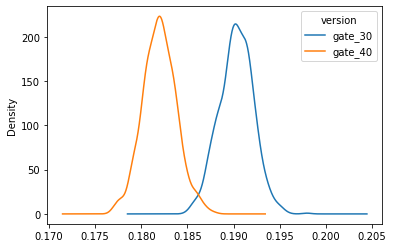

In [15]:
plt.figure(figsize=(15, 10))
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density');

In [16]:
print(f'gate_30 median retention_7 = {boot_1d.gate_30.median()}')
print(f'gate_40 median retention_7 = {boot_1d.gate_40.median()}')

gate_30 median retention_7 = 0.19033039411288738
gate_40 median retention_7 = 0.181973985329079


Применив бутстраповский отбор, видим что распределения средних **retention_7** для гипотетических генеральных совокупностей различны.<br>
Также, используя U-тест Манна-Уитни, продемонстрируем наличие эффекта из-за сдвига ворот в отношении количества игровых раундов, сыгранных игроком в течение первой недели после установки.<br>
H0 - Одинаковые распределения, H1 - Разные распределения:

In [17]:
# https://www.statology.org/mann-whitney-u-test-python/

alpha = 0.05
pvalue = stats.mannwhitneyu(v_30.sum_gamerounds, v_40.sum_gamerounds)[1]
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Разные распределения (отвергаем H0)")
else:
    print("Одинаковые распределения (не отвергаем H0)")


pvalue = 0.026880187162778638
Разные распределения (отвергаем H0)


Можно сделать вывод, что существует статистически значимая разница между двумя группами относительно перемещения первых ворот с уровня 30 на уровень 40.<br>

И если например для нашей игры важным показателем для выручки является удержание, то переносить ворота на более поздние уровни не нужно. Похоже, что играя больше игр подряд, не получая перерыв, игроки быстрее теряют интерес.<br>

Хоть разница средних значений удержания retention_7 кажется небольшой: 0.190 и 0.182, но для больших масштабов (миллионы игроков) в денежном выражении она уже будет существенна.

<div class="alert alert-success">
<h4></h4>
</div>

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [18]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [19]:
pokemon.columns = ['pid', 'name', 'class_1', 'class_2', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'legendary']

In [20]:
t1 = pokemon.query("(class_1 == 'Grass' and class_2 == 'Rock') or (class_2 == 'Grass' and class_1 == 'Rock')")
t1

,pid,name,class_1,class_2,hp,attack,defense,sp_attack,sp_defense,speed,legendary
377,378,Lileep,Rock,Grass,66,41,77,61,87,23,False
378,379,Cradily,Rock,Grass,86,81,97,81,107,43,False


In [21]:
pokemon_t1 = pokemon.drop(t1.index)

In [22]:
A = pokemon_t1.query("class_1 == 'Grass' or class_2 == 'Grass'")
B = pokemon_t1.query("class_1 == 'Rock' or class_2 == 'Rock'")

H0 - обычная атака у покемонов класса **Grass** такая же как у класса **Rock** или меньше<br>
H1 - обычная атака у покемонов класса **Grass** больше, чем у класса **Rock**<br>


pvalue = 0.9995179726543227
Не получилось отвергнуть нулевую гипотезу


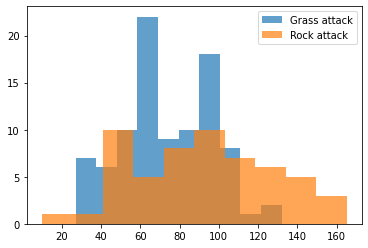

In [23]:
alpha = 0.05
pvalue = stats.ttest_ind(A.attack, B.attack, equal_var=False, alternative='greater').pvalue
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
plt.hist(A.attack, alpha=0.7, label='Grass attack');
plt.hist(B.attack, alpha=0.7, label='Rock attack');
plt.legend(loc='upper right');

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [24]:
t2 = pokemon.query("(class_1 == 'Water' and class_2 == 'Normal') or (class_2 == 'Water' and class_1 == 'Normal')")
t2

,pid,name,class_1,class_2,hp,attack,defense,sp_attack,sp_defense,speed,legendary
445,446,Bibarel,Normal,Water,79,85,60,55,60,71,False


In [25]:
pokemon_t2 = pokemon.drop(t2.index)

In [26]:
A = pokemon_t2.query("class_1 == 'Water' or class_2 == 'Water'")
B = pokemon_t2.query("class_1 == 'Normal' or class_2 == 'Normal'")

H0 - скорость у покемонов класса Water такая же как у класса Normal или меньше <br>
H1 - скорость у покемонов класса Water больше, чем у класса Normal


pvalue = 0.9815261383086286
Не получилось отвергнуть нулевую гипотезу


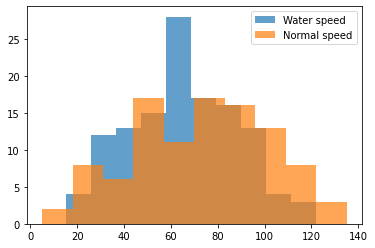

In [28]:
alpha = 0.05
pvalue = stats.ttest_ind(A.speed, B.speed, equal_var=False, alternative='greater').pvalue
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
plt.hist(A.speed, alpha=0.7, label='Water speed');
plt.hist(B.speed, alpha=0.7, label='Normal speed');
plt.legend(loc='upper right');

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [29]:
# аналогичная задача №4

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [30]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [31]:
A = pokemon.query("name == @treathed_pokemon")
A

,pid,name,class_1,class_2,hp,attack,defense,sp_attack,sp_defense,speed,legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [32]:
B = pokemon.drop(A.index)

H0 - скорость у покемонов, которые принимали сыворотку такая же как у остальных или меньше <br>
H1 - скорость у покемонов, которые принимали сыворотку больше, чем у остальных


pvalue = 4.053762771821796e-05
Отвергаем нулевую гипотезу


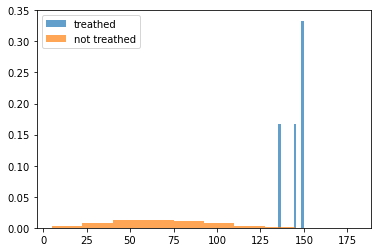

In [34]:
alpha = 0.05
pvalue = stats.ttest_ind(A.speed, B.speed, equal_var=False, alternative='greater').pvalue
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
plt.hist(A.speed, alpha=0.7, label='treathed', density=True);
plt.hist(B.speed, alpha=0.7, label='not treathed', density=True);
plt.legend(loc='upper left');

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [35]:
def get_hp_attack_defense_sum(row):
    return row.hp + row.attack + row.defense

def get_hp_attack_defense_product(row):
    return row.hp * row.attack * row.defense

In [36]:
pokemon['p_sum'] = pokemon.apply(get_hp_attack_defense_sum, axis=1)
pokemon['p_product'] = pokemon.apply(get_hp_attack_defense_product, axis=1)

In [37]:
pokemon.head(3)

,pid,name,class_1,class_2,hp,attack,defense,sp_attack,sp_defense,speed,legendary,p_sum,p_product
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480


In [38]:
A = pokemon.loc[pokemon.legendary]
B = pokemon.drop(A.index)

H0 - сумма характеристик HP, Attack, Defense у легендарных покемонов такая же как у остальных или меньше <br>
H1 - сумма характеристик HP, Attack, Defense у легендарных покемонов больше, чем у остальных


pvalue = 1.4641359351664928e-26
Отвергаем нулевую гипотезу


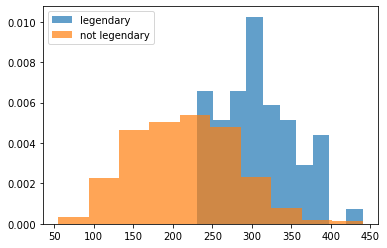

In [40]:
alpha = 0.05
pvalue = stats.ttest_ind(A.p_sum, B.p_sum, equal_var=False, alternative='greater').pvalue
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
plt.hist(A.p_sum, alpha=0.7, label='legendary', density=True);
plt.hist(B.p_sum, alpha=0.7, label='not legendary', density=True);
plt.legend(loc='upper left');

H0 - произведение характеристик HP, Attack, Defense у легендарных покемонов такая же как у остальных или меньше <br>
H1 - произведение характеристик HP, Attack, Defense у легендарных покемонов больше, чем у остальных


pvalue = 1.447519440453694e-15
Отвергаем нулевую гипотезу


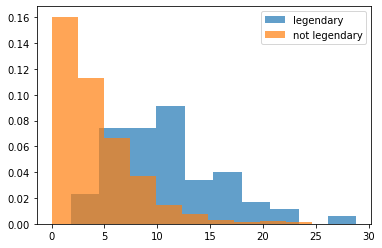

In [41]:
alpha = 0.05
pvalue = stats.ttest_ind(A.p_product, B.p_product, equal_var=False, alternative='greater').pvalue
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
plt.hist(A.p_product/10**5, alpha=0.7, label='legendary', density=True);
plt.hist(B.p_product/10**5, alpha=0.7, label='not legendary', density=True);
plt.legend(loc='upper right');

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [42]:
# описание задания нужно поправить: 
# 1) четыре класса, а не три 
# 2) последний абзац остался с предыдущего задания

In [43]:
best_defence_class = ['Rock','Ground','Steel','Ice']

In [44]:
rock_pokemons = pokemon.query("class_1 == 'Rock' or class_2 == 'Rock'")
ground_pokemons = pokemon.query("class_1 == 'Ground' or class_2 == 'Ground'")
steel_pokemons = pokemon.query("class_1 == 'Steel' or class_2 == 'Steel'")
ice_pokemons = pokemon.query("class_1 == 'Ice' or class_2 == 'Ice'")

H0: Нет значимого различия по уровню защиты у выбранных классов покемонов<br>
H1: Есть значимое различие<br>
Уровень значимости: 5%


pvalue = 1.231528168152447e-06
Отвергаем нулевую гипотезу

Гистограмма и Диаграмма размаха:


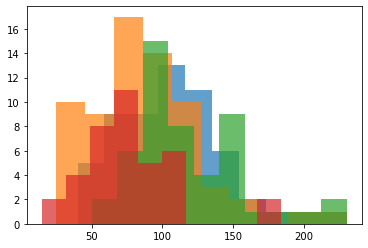

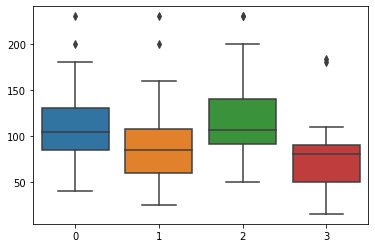

In [45]:
alpha = 0.05
pvalue = stats.f_oneway(rock_pokemons.defense, ground_pokemons.defense, 
                        steel_pokemons.defense, ice_pokemons.defense).pvalue
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(f'\nГистограмма и Диаграмма размаха:')
plt.hist(rock_pokemons.defense, alpha=0.7);
plt.hist(ground_pokemons.defense, alpha=0.7);
plt.hist(steel_pokemons.defense, alpha=0.7);
plt.hist(ice_pokemons.defense, alpha=0.7);
plt.show()
sns.boxplot(data=[rock_pokemons.defense, ground_pokemons.defense, 
                  steel_pokemons.defense, ice_pokemons.defense]);

<div class="alert alert-success">
<h4></h4>
</div>